### 목표 설정
- 선형 회귀 이론 및 선형 회귀 모델의 사용법을 실습
- 해당 방식으로 집값을 에측해 보기
- 

In [123]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [124]:
# 파일 import
url = './data/melb_data.csv'

In [125]:
data = pd.read_csv(url)
data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [126]:
print(data.info())
print(end='\n\n')
print(data.shape)
print(end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

- 결측치가 있다
- 문자형 데이터와, 수치(실수)형 데이터가 있다.

Suburb: 주택이 위치한 교외 지역의 이름  
Address: 주택의 주소  
Rooms: 주택의 방 개수  
Type: 주택 유형 (h: 주택, u: 유닛, t: 타운하우스)   
```
주택: 단독주택,  유닛:  다세대연립주택(빌라),  타운하우스 : 풀빌라들 생각하면 됨 ㅋㅋ
```
Price: 주택 가격  
Method: 판매 방법 (S: 매매, SP: 매매 후 가격 공개, PI: 경매 전에 가격, VB: 경매 후 가격 공개)  
SellerG: 판매 대행 부동산 중개인의 이름  
Date: 판매 날짜  
Distance: 주택이 CBD (중심 업무 지구)에서 떨어진 거리 (킬로미터 단위)  
Postcode: 우편번호  
Bedroom2: 주택의 침실 개수 (2개의 침실을 갖춘 주택)  
Bathroom: 주택의 욕실 개수  
Car: 주차 가능한 자동차 수  
Landsize: 대지 면적 (평방 미터 단위)  
BuildingArea: 건축 면적 (평방 미터 단위)  
YearBuilt: 주택이 건축된 연도  
CouncilArea: 관할 구역  
Lattitude: 주택의 위도  
Longtitude: 주택의 경도  
Regionname: 지역 이름  
Propertycount: 지역 내의 부동산 개수  

In [129]:
print(data.isnull().sum().sort_values(ascending = False))
print(end='\n\n')

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64




### EDA(탐색적 데이터 분석)

In [131]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## 가설
1. 방이 많으면 집값이 오를 것이다

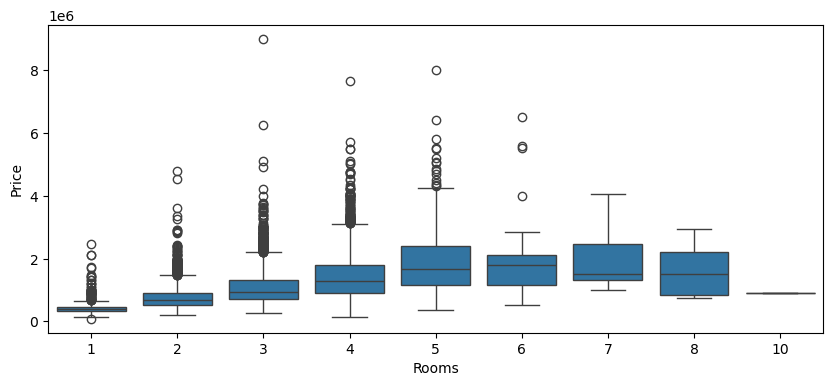

In [133]:
plt.figure(figsize=(10, 4))

sns.boxplot(x = 'Rooms', y = 'Price', data = data)

plt.show()

# 방의 갯수가 증가할 수록 주택 가격의 중앙값은 상승하는 추세이다. 다만 방이 7개 이상인 경우에는 주택 가격이 내려가는 것으로 보인다
# 따라서 주택 수가 7개 이상인 경우, 중앙값을 확인하는 것은 의미가 없다

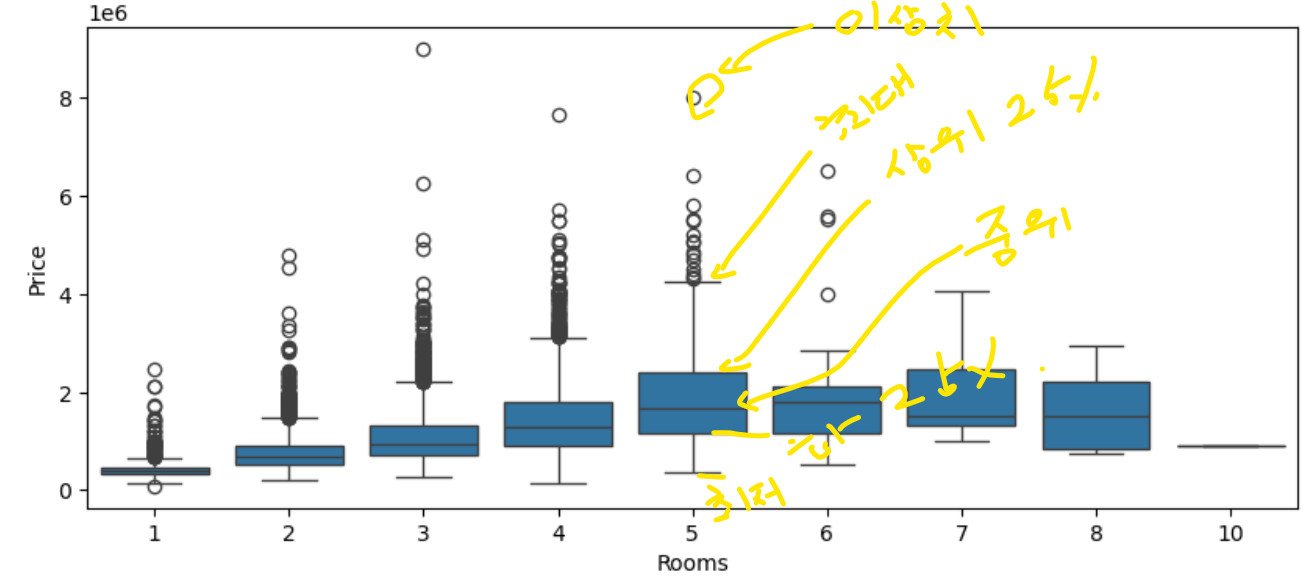

In [135]:
# 방의 갯수가 3개인 데이터의 이상치 갯수 확인
# data에서 방이 3개인 데이터 추출

three_rooms_data = data[data['Rooms'] == 3].describe().astype('int') 
three_rooms_data
# 주택 가격의 75%(3사분위) 값을 확인했을 떄 최소값으로 쏠린 것을 확인 - 최솟값쫏의 데이터 분포가 많다

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5881,5881,5881,5881,5881,5881,5852,5881,2967,3336,5881,5881,5881
mean,3,1076080,11,3099,2,1,1,597,139,1962,-37,144,7311
std,0,502106,6,91,0,0,0,5855,63,38,0,0,4443
min,3,283000,1,3000,0,0,0,0,0,1196,-38,144,249
25%,3,725000,7,3042,3,1,1,258,111,1940,-37,144,3873
50%,3,950000,10,3075,3,1,2,472,129,1965,-37,144,6482
75%,3,1320000,13,3146,3,2,2,636,152,1997,-37,145,9758
max,3,9000000,45,3977,20,6,10,433014,1041,2017,-37,145,21650


             Price
Type              
h     1.242665e+06
t     9.337351e+05
u     6.051275e+05


<Axes: xlabel='Type'>

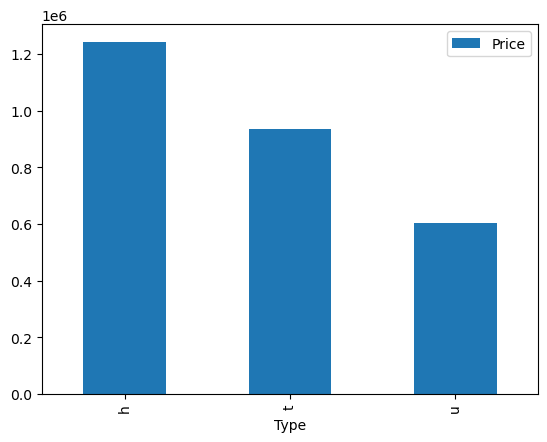

In [136]:
# 타입에 대한 가격 평균 확인
types_data = data[['Type', 'Price']].groupby('Type').mean()
print(f'{types_data}')

types_data.plot(kind = 'bar')

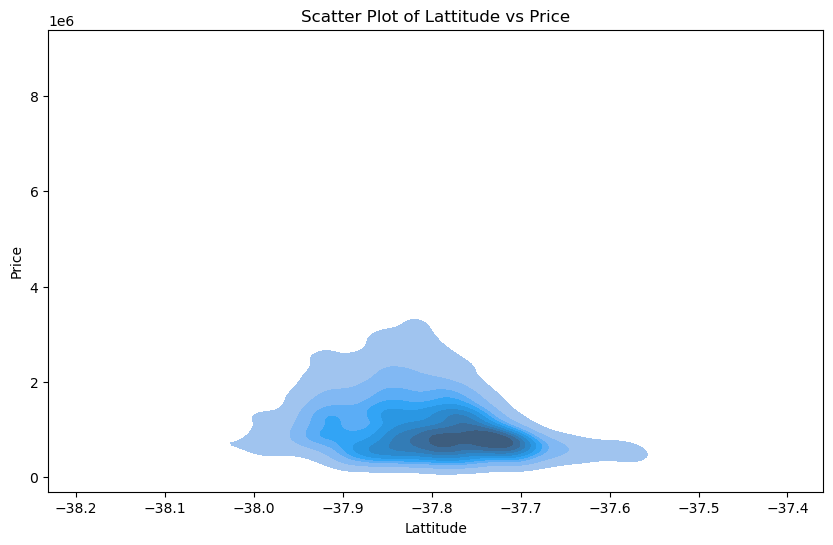

In [137]:
# 위도와 가격에 따른 밀도 확인(주택이 얼마나 밀집해 있는가?)
# 우선, 호주의 경우 해안가에만 사람들이 거주하고 있는 특성을 가지고 있다.
lattitude_data = data[['Lattitude', 'Price']]
lattitude_data

plt.figure(figsize=(10, 6))

sns.kdeplot(data = lattitude_data, x = 'Lattitude', y = 'Price', fill = True)
plt.title('Scatter Plot of Lattitude vs Price')

plt.show()

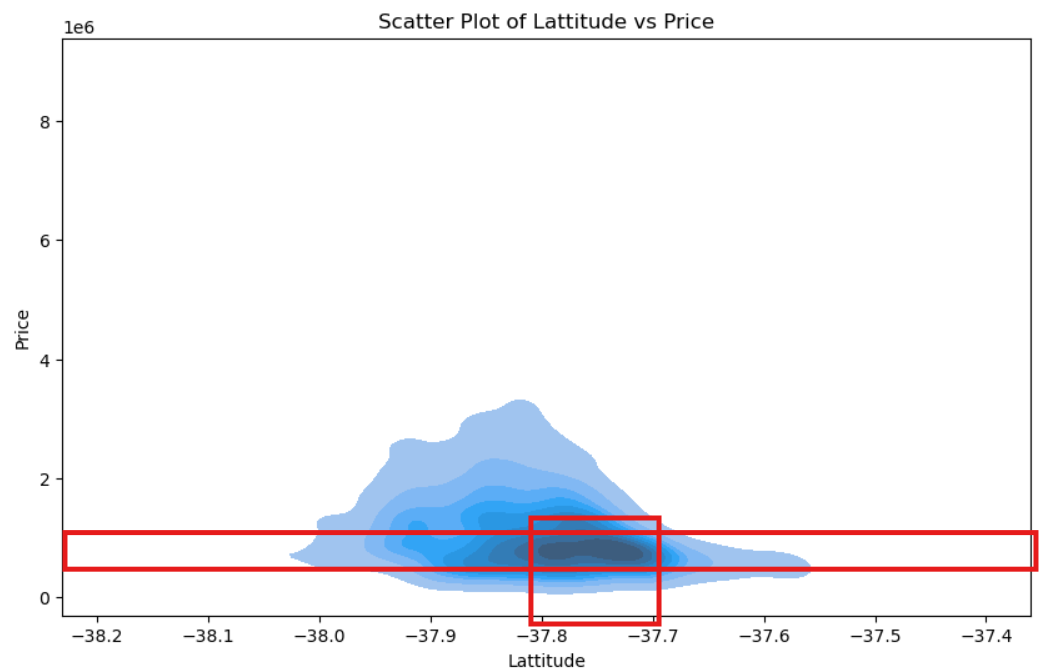

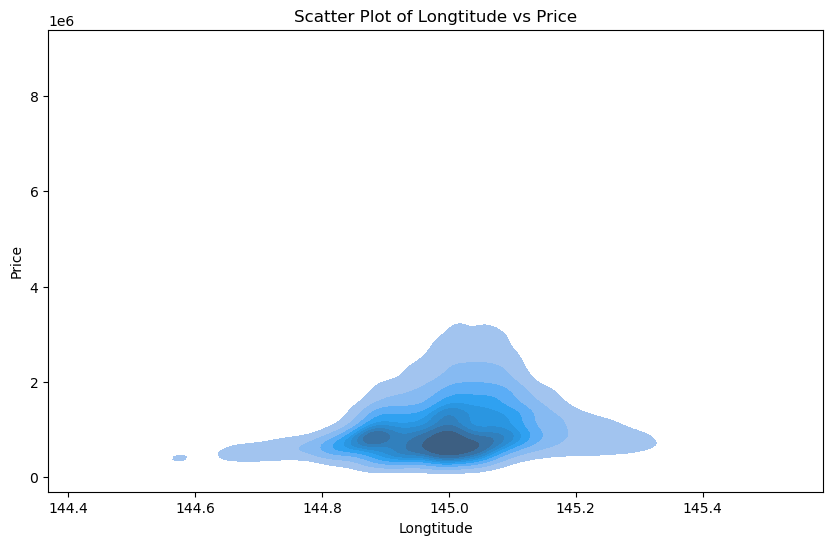

In [139]:
# 경도와 가격에 따른 밀도 확인(주택이 얼마나 밀집해 있는가?)
# 우선, 호주의 경우 해안가에만 사람들이 거주하고 있는 특성을 가지고 있다.
longtitude_data = data[['Longtitude', 'Price']] 

plt.figure(figsize=(10, 6))

sns.kdeplot(data = longtitude_data, x = 'Longtitude', y = 'Price', fill = True)
plt.title('Scatter Plot of Longtitude vs Price')

plt.show()

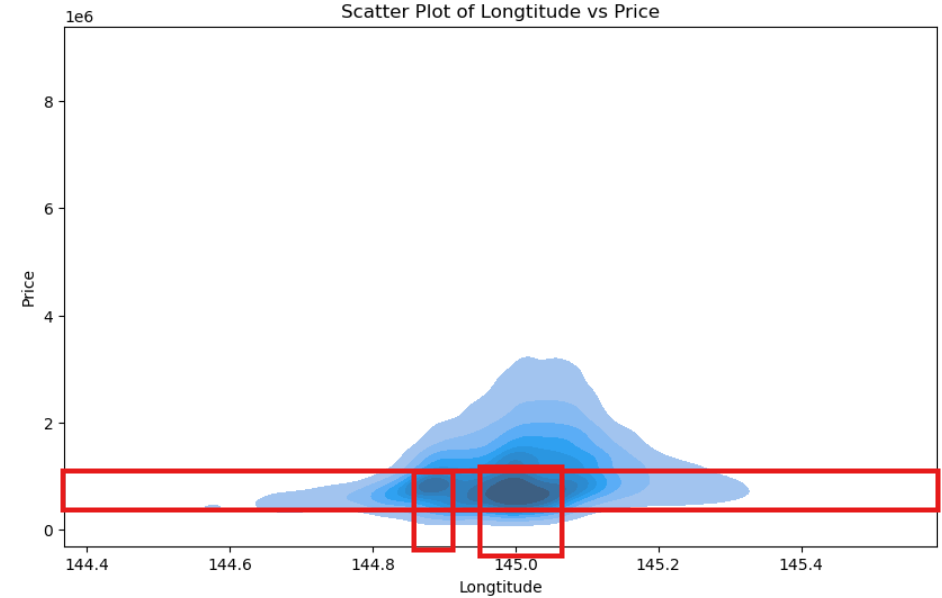


### 특정 지역에 사람이 몰려 있다

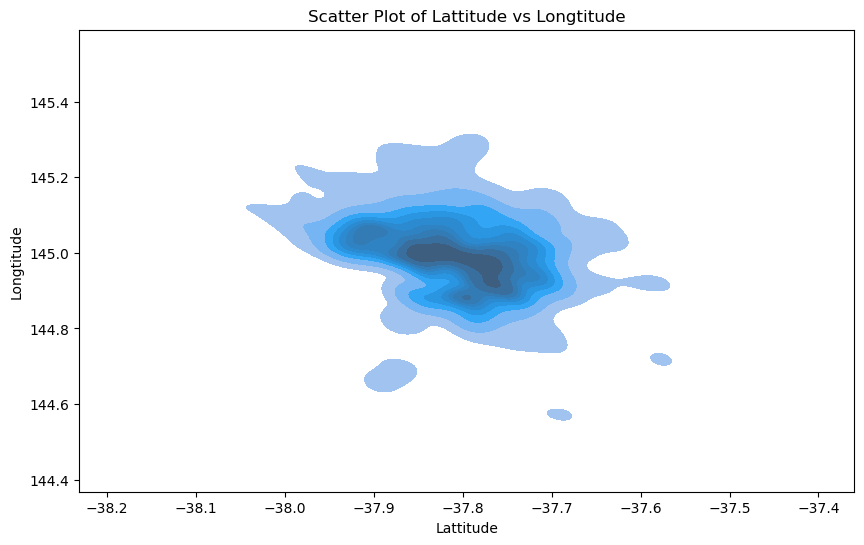

In [141]:
# 
lattitude_longtitude = data[['Lattitude', 'Longtitude']]
lattitude_longtitude

plt.figure(figsize=(10, 6))

sns.kdeplot(data = lattitude_longtitude, x = 'Lattitude', y = 'Longtitude', fill = True)
plt.title('Scatter Plot of Lattitude vs Longtitude')

plt.show()

['Yarra' 'Moonee Valley' 'Port Phillip' 'Darebin' 'Hobsons Bay'
 'Stonnington' 'Boroondara' 'Monash' 'Glen Eira' 'Whitehorse'
 'Maribyrnong' 'Bayside' 'Moreland' 'Manningham' 'Banyule' 'Melbourne'
 'Kingston' 'Brimbank' 'Hume' nan 'Knox' 'Maroondah' 'Casey' 'Melton'
 'Greater Dandenong' 'Nillumbik' 'Whittlesea' 'Frankston' 'Macedon Ranges'
 'Yarra Ranges' 'Wyndham' 'Cardinia' 'Unavailable' 'Moorabool']


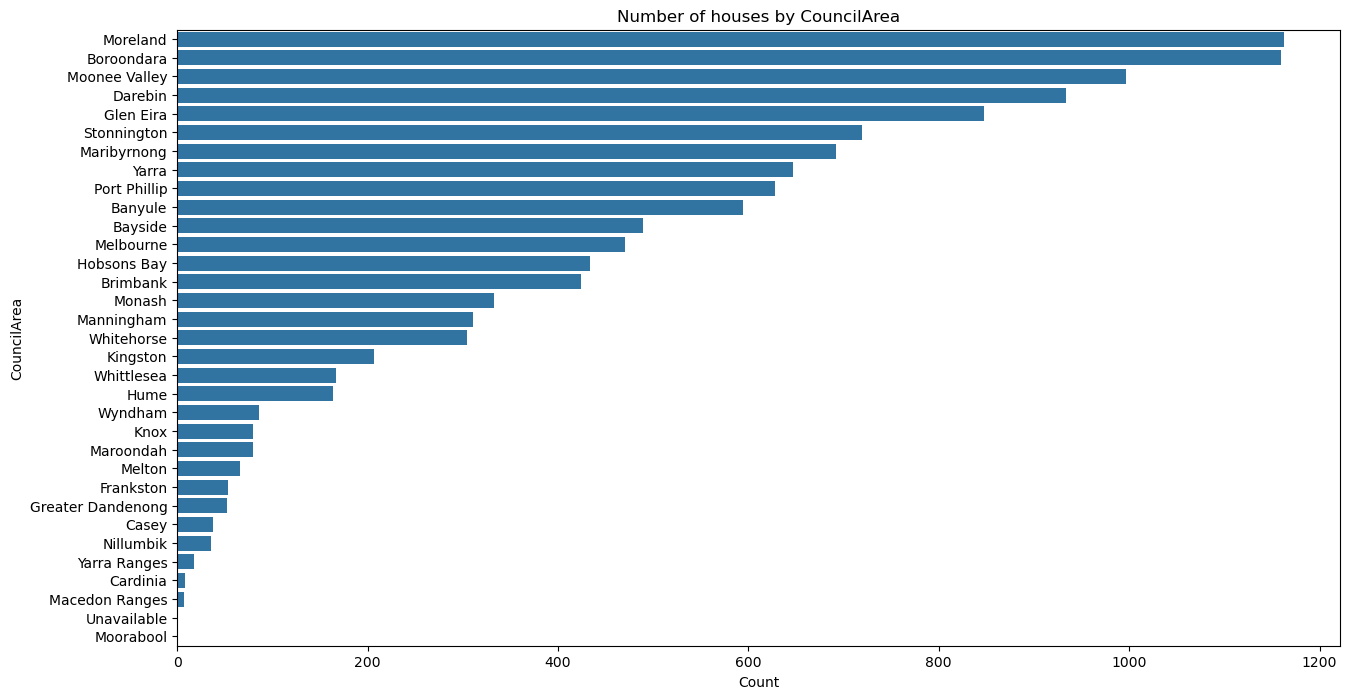

In [142]:
# CouncilArea(관할구역) 값 확인
# 다만 여기에 결측치가 있었음 

# 데이터 고유값 확인
print(data['CouncilArea'].unique())
# nan : 결측치는 전부 'nan'으로 처리 됐음을 확인 가능
# Unavailable : 아직 개척이 덜 된 지역의 거주자, 혹은 인구수가 매우 적은 지역이라 담당 관청이 없을 경우
#  --> 관할구역이 배정되지 않은 구역도 있다.

councilArea_data = data[['CouncilArea']]

plt.figure(figsize=(15,8))

sns.countplot(data = councilArea_data, 
              y = councilArea_data['CouncilArea'], 
              order=councilArea_data['CouncilArea'].value_counts().index
             )

plt.xlabel('Count')
plt.ylabel('CouncilArea')

plt.title('Number of houses by CouncilArea')

plt.show()

# 결측치인 nan의 경우 출력 자체가 되지도 않음 

In [143]:

# 결측치 확인
print(councilArea_data['CouncilArea'].isnull().sum())
# 전체 데이터의 약 10%에 해당하는 결측치의 양을 확이할 수 있음.

1369


### 1번 방법 : 최빈값을 이용해서 결측치를 넣어보기 

In [145]:
# moreland 활용

new_councilArea_data = pd.DataFrame({'CouncilArea': councilArea_data['CouncilArea'].fillna('Moreland')}) 

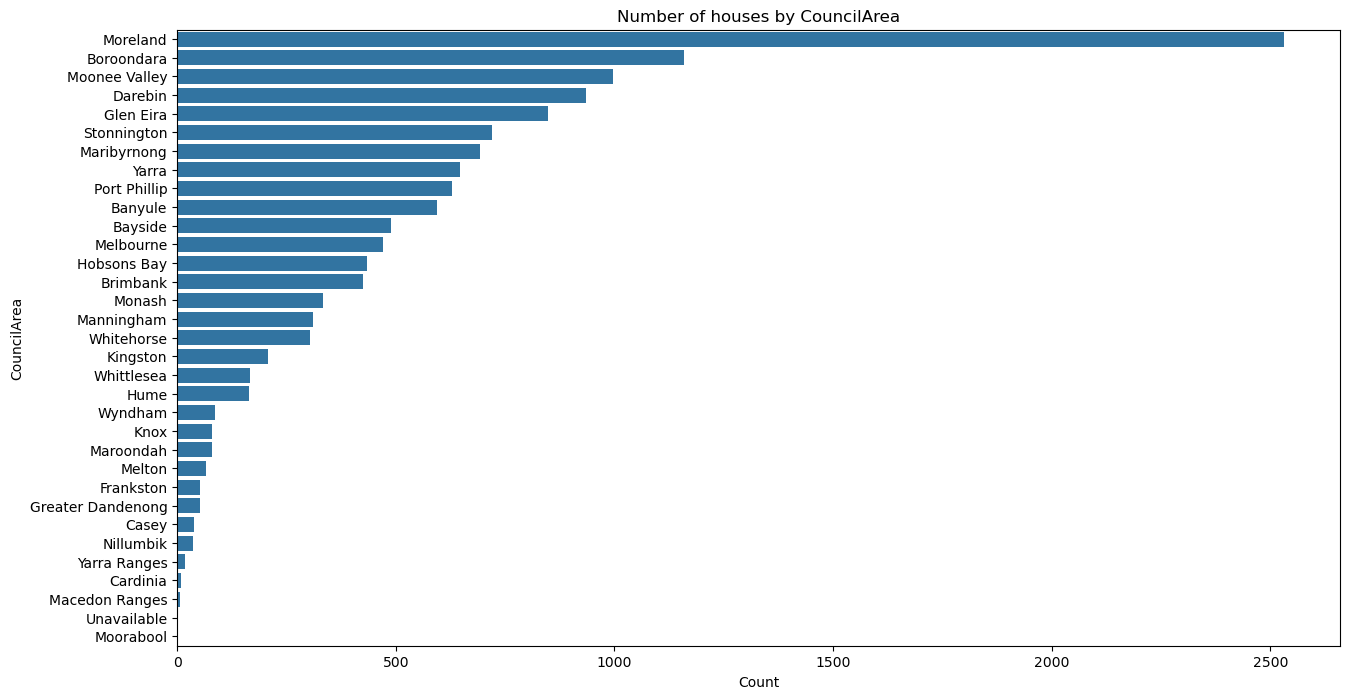

In [146]:
plt.figure(figsize=(15,8))

sns.countplot(data = new_councilArea_data, 
              y = new_councilArea_data['CouncilArea'], 
              order=new_councilArea_data['CouncilArea'].value_counts().index
             )

plt.xlabel('Count')
plt.ylabel('CouncilArea')

plt.title('Number of houses by CouncilArea')

plt.show()

In [147]:
# 문제는 기존 data 파일을 확인해 보니 최빈값('MoerLand')의 분포와 비슷한 분포를 가진 다른 데이터(Boroondara')가 있음

In [148]:
# 전체 행 출력하기
pd.set_option('display.max_rows', None)

In [149]:
# 그럼, 무엇을 보고 결측치를 해결해야 되는가?
# 옹이름, 우편번호 등

# 지역 이름을 통해서 지역과 매칭된 관할 구역의 수를 확인해 보자

data.pivot_table(values = 'Rooms',
                index = ['Suburb', 'CouncilArea'],
                aggfunc='count')

# 값을 확인해 보자
# 매칭되어 있는 관할 구역의 수 파악
# --> 하나의 관할구역에 여러 지역이 매칭되어 있는 데이터가 있다.
# 각 관할구역별 최빈값을 이용해서 결측치를 채워주자

# 단순 최빈값을 이용하는 것이 아니라, 연관된 데이터와 연결시켜 데이터를 좀 더 세분화 시켜 확인

Rooms
Suburb             CouncilArea             
Abbotsford         Yarra                 55
Aberfeldie         Moonee Valley         40
Airport West       Moonee Valley         61
Albanvale          Brimbank               4
Albert Park        Port Phillip          64
Albion             Brimbank              38
Alphington         Darebin               25
                   Yarra                  7
Altona             Hobsons Bay           69
Altona Meadows     Hobsons Bay            4
Altona North       Hobsons Bay           49
Ardeer             Brimbank               2
Armadale           Stonnington           86
Ascot Vale         Moonee Valley        125
Ashburton          Boroondara            53
Ashwood            Monash                45
Aspendale          Kingston               4
Aspendale Gardens  Kingston               2
Avondale Heights   Moonee Valley         73
Bacchus Marsh      Moorabool              1
Balaclava          Port Phillip          25
Balwyn             Boroondara           101
Balwyn North       Boroondara           151
Bayswater          Knox                  12
Bayswater North    Maroondah              5
Beaconsfield       Cardinia               2
Beaconsfield Upper Cardinia               1
Beaumaris          Bayside               11
Bellfield          Banyule               15
Bentleigh          Glen Eira            131
Bentleigh East     Glen Eira            234
Berwick            Casey                 11
Black Rock         Bayside                8
Blackburn          Whitehorse            13
Blackburn North    Whitehorse             7
Blackburn South    Whitehorse             8
Bonbeach           Kingston               1
Boronia            Knox                  12
Box Hill           Whitehorse            54
Braybrook          Maribyrnong           44
Briar Hill         Banyule                5
Brighton           Bayside              176
Brighton East      Bayside              124
                   Glen Eira              4
Broadmeadows       Hume                  17
Brookfield         Melton                 1
Brooklyn           Brimbank               1
                   Hobsons Bay            7
Brunswick          Moreland             208
Brunswick East     Moreland              80
Brunswick West     Moreland             102
Bulleen            Manningham            65
Bullengarook       Macedon Ranges         1
Bundoora           Banyule               13
                   Darebin                2
                   Whittlesea            10
Burnley            Yarra                  7
Burnside Heights   Melton                 2
Burwood            Monash                14
                   Whitehorse            61
Burwood East       Whitehorse            12
Cairnlea           Brimbank               7
Camberwell         Boroondara           124
Campbellfield      Hume                   3
Canterbury         Boroondara            51
Carlton            Melbourne             48
Carlton North      Yarra                 44
Carnegie           Glen Eira            138
Caroline Springs   Melton                 9
Carrum             Kingston               9
Carrum Downs       Frankston              7
Caulfield          Glen Eira             12
Caulfield East     Glen Eira              8
Caulfield North    Glen Eira             35
Caulfield South    Glen Eira             45
Chadstone          Monash                34
Chelsea            Kingston               4
Chelsea Heights    Kingston               2
Cheltenham         Bayside                4
                   Kingston              26
Chirnside Park     Yarra Ranges           2
Clarinda           Kingston               2
Clayton            Monash                11
Clayton South      Kingston               3
Clifton Hill       Yarra                 52
Coburg             Moreland             176
Coburg North       Darebin                1
                   Moreland              53
Collingwood        Yarra                 62
Coolaroo           Hume           

In [150]:
# 관할구역별 최빈값으로 구성된 테이블 생성(시리즈 현태)

mode_data = data.groupby('Suburb')['CouncilArea'].agg(pd.Series.mode)
mode_data

# 특이점 : Burnside, Monbulk, New Gisborne 등과 같은 경우 []로 비어있음

Suburb
Abbotsford                        Yarra
Aberfeldie                Moonee Valley
Airport West              Moonee Valley
Albanvale                      Brimbank
Albert Park                Port Phillip
Albion                         Brimbank
Alphington                      Darebin
Altona                      Hobsons Bay
Altona Meadows              Hobsons Bay
Altona North                Hobsons Bay
Ardeer                         Brimbank
Armadale                    Stonnington
Ascot Vale                Moonee Valley
Ashburton                    Boroondara
Ashwood                          Monash
Aspendale                      Kingston
Aspendale Gardens              Kingston
Attwood                              []
Avondale Heights          Moonee Valley
Bacchus Marsh                 Moorabool
Balaclava                  Port Phillip
Balwyn                       Boroondara
Balwyn North                 Boroondara
Bayswater                          Knox
Bayswater North               Mar

In [151]:
# 결측치를 채울 때는 단순 기술 통계량이 아닌, ㅇ연관성이 있는 데이터로 채워주므로써 모델의 성능을 높힐 수 있다.
# 결측치를 채우는 함수를 만들고, 데이터 프레임에 연결해서 값을 채워주자

def fill_council(row) :
    if pd.isnull(row['CouncilArea']) :
        return mode_data[row['Suburb']]
    else :
        return row['CouncilArea']

In [152]:
# 결측치 채우기
data['CouncilArea'] = data.apply(fill_council, axis=1)

In [153]:
print(f'CouncilArea의 결측치 수 : {data['CouncilArea'].isnull().sum()}개 ')

CouncilArea의 결측치 수 : 0개 


In [154]:
# 특성 선택
# 모델링 작업을 위해 컬럼(입력특성) 성택 -> 정답과 상관관계가 높은 컬럼을 선택해서 사용

# 상관관계 확인
corr_ = data.corr(numeric_only = True)
result_price_corr = corr_['Price'].sort_values(ascending = False)
# result_price_corr = corr_['Price'].abs().sort_values(ascending = False)
print(result_price_corr)

# 상관관계를 확인하는 방법
# 상관관계 범위 : -1 ~ 1
# 상관관계 값을 확인하는 방법 : 1에 가까울수록 연관성이 높음.

# 1. 상관관계 수치값을 절대값으로 변환할 것.(절대값이 1에 가까울수록 상관관계가 높다 )
# 2. 기호를 확인 (+ , -) : 양수 : 양의 상관관계,   음수 : 음의 상관관계
#    양의 상관관계 : X가 증가하면 y도 증가 (비례)
#    음의 상관관계 : X가 증가하면 y가 감소 (반비례)



Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64


In [155]:
# 컬럼 특성 공아내기

feature_names = ['Rooms', 'Bedroom2', 'Bathroom', 'Longtitude', 'Lattitude', 'Distance', 'Type', 'CouncilArea']

In [156]:
# 전체 행 보기 초기화
pd.reset_option('display.max_rows')

In [157]:
# 문제 데이터 추출하기
X = data[feature_names]

# 정답 데이터 추출
y = data['Price']

In [158]:
# 훈련용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split

In [159]:
# 문제 분할 시도

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 15
)

In [160]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (9506, 8)
X_test.shape :  (4074, 8)
y_train.shape :  (9506,)
y_test.shape :  (4074,)


In [161]:
# 문제 데이터 원핫 인코딩 진행하기

try :
    X_train.oh = pd.get_dummies(X_train)
except TypeError as e : 
    print(f'{e}')

# 원한 잇코딩 시 오류가 발생 -> 데이터 내부에 배열형태가 존재
# 배열 형태의 데이터를 제거
 
# X.loc[:, 'CouncilArea'] = X['CouncilArea'].astype(str)
X['CouncilArea'] = X['CouncilArea'].astype('str')

unhashable type: 'numpy.ndarray'


C:\Users\smhrd1\AppData\Local\Temp\ipykernel_4992\969184023.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CouncilArea'] = X['CouncilArea'].astype('str')


In [162]:
dd = X[X['CouncilArea'] == '[]']
dd.sum()

Rooms                      25
Bedroom2                 25.0
Bathroom                 14.0
Longtitude         1014.10447
Lattitude          -263.62727
Distance                196.3
Type                  hhhhhhh
CouncilArea    [][][][][][][]
dtype: object

In [163]:
X.drop(dd.index, inplace=True)
y.drop(dd.index, inplace=True)

C:\Users\smhrd1\AppData\Local\Temp\ipykernel_4992\2979375010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(dd.index, inplace=True)


In [164]:
X.shape, y.shape

((13573, 8), (13573,))

In [166]:
# 데이터 분할 전에 원학 인코딩 진행

X_oh = pd.get_dummies(X, dtype = int)
X_oh

,Rooms,Bedroom2,Bathroom,Longtitude,Lattitude,Distance,Type_h,Type_t,Type_u,CouncilArea_Banyule,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,2.0,1.0,144.99840,-37.79960,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2.0,1.0,144.99340,-37.80790,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,3.0,2.0,144.99440,-37.80930,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,3.0,2.0,144.99690,-37.79690,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,3.0,1.0,144.99410,-37.80720,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,4.0,2.0,145.16761,-37.90562,16.7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13576,3,3.0,2.0,144.87904,-37.85927,6.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13577,3,3.0,2.0,144.88738,-37.85274,6.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13578,4,4.0,1.0,144.89299,-37.85908,6.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
# 
X_train, X_test, y_train, y_test = train_test_split(
    X_oh, y, test_size=0.3, random_state=15
)


In [170]:
# 모델 불러오기

from sklearn.linear_model import LinearRegression

In [172]:
# 모델 객체 생성

lin_model = LinearRegression()

In [174]:
# 모델 학습
lin_model.fit(X_train, y_train)

LinearRegression()

In [184]:
# 모델 가충치 절편 확인하기
print(f'가중치 : {lin_model.coef_}')
print(f'절편 : {lin_model.intercept_}') 

가중치 : [  163892.78681096    22563.1532634    174294.84542654  -185600.60280988
 -2033052.80691804   -33099.02138399   297050.35728287   -50794.51673861
  -246255.84054449    27438.70464064   354289.41188496   476748.42820034
  -352947.34149688   -85164.15469643  -314160.23709599     8269.82052802
  -273309.57641057   -15994.89317261  -283857.68577283  -237908.15604898
   -72281.24831569  -187765.87960523  -117101.57985937   850354.90856491
   153156.57596208  -270504.16753235   102432.25573652     9252.33050168
  -171959.02331075    11937.93598819   -27580.29301836   251769.68526403
   -95361.05611291    34608.94156258   127942.14962143   282298.14034573
    83870.30856801   137628.7207202     22373.80227519  -687817.48072102
    36234.95497233   223105.69783274]
절편 : -49541731.34363302


In [186]:
# 모델평가
lin_model.score(X_test, y_test)

0.6281281634114178

In [192]:
# 평가 지표를 통한 평균제곱오차, 평균제곱근 오차를 확인해 보자
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [200]:
# MSE : 평균 제곱 오차
# RMSE : 평균 제곱근 오차

pred = lin_model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)

print(f'mse : {mse}')
print(f'rmse : {rmse}')

mse : 158769720966.3052
rmse : 398459.1835637688


In [204]:
# 평균 제곱근 오차를 실제로 구해보기
# np.square() - 제곱근 구하기
np.square(mse)

2.5207824295718415e+22